# **Problem Statement**


##
AtliQ Motors is an automotive giant from the USA specializing in electric vehicles 
(EV). In the last 5 years, their market share rose to 25% in electric and hybrid 
vehicles segment in North America. As a part of their expansion plans, they wanted 
to launch their bestselling models in India where their market share is less than 2%. 
Bruce Haryali, the chief of AtliQ Motors India wanted to do a detailed market study 
of existing EV/Hybrid market in India before proceeding further. Bruce gave this task 
to the data analytics team of AtliQ motors and Peter Pandey is the data analyst 
working in this team.


## ***1. Know Your Data***

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time


### Dataset Loading

In [ ]:
# Load Dataset
date_dim=pd.read_csv('datasets/dim_date.csv')
ev_sales_makers=pd.read_csv('datasets/electric_vehicle_sales_by_makers.csv')
ev_sales_state= pd.read_csv('datasets/electric_vehicle_sales_by_state.csv')

### Dataset First View

In [ ]:
# Dataset overvies of sales date
date_dim.head()

In [ ]:
# First Look of EV sales makers dataset
ev_sales_makers.head()

In [ ]:
# First Look of EV sales by states dataset
ev_sales_state.head()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows(Observation) & Columns count(Feature)
print(f'Total observation and feature for date table: {date_dim.shape}')
print(f'Total observation and feature for EV sales  by makers: {ev_sales_makers.shape}')
print(f'Total observation and feature for EV sales by states: {ev_sales_state.shape}')

### Dataset Information

In [ ]:
# Dataset Info
print('Date table  Info')
print('='*120)
date_dim.info()
print('='*120)
print('\n')
print('EV Makers Info')
print('='*120)
ev_sales_makers.info()
print('='*120)
print('\n')
print('EV Sales by State Info')
print('='*120)
ev_sales_state.info()
print('='*120)


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print('For Date Table :')
print('\n')
print(f"Data is duplicated ? {date_dim.duplicated().value_counts()},unique values with {len(date_dim[date_dim.duplicated()])} duplication")
print('='*120)
print('\n')
print('For EV Sales Makers Table :')
print('\n')
print(f"Data is duplicated ? {ev_sales_makers.duplicated().value_counts()},unique values with {len(ev_sales_makers[ev_sales_makers.duplicated()])} duplication")
print('='*120)
print('\n')
print('For EV Sales State Table :')
print('\n')
print(f"Data is duplicated ? {ev_sales_state.duplicated().value_counts()},unique values with {len(ev_sales_state[ev_sales_state.duplicated()])} duplication")
print('='*120)

#### Missing Values/Null Values

In [ ]:
# missing value for Date table
date_dim.isnull().sum()

In [ ]:
# missing value for EV Makers table
ev_sales_makers.isnull().sum()

In [ ]:
# missing value for EV Sales by State table
ev_sales_state.isnull().sum()

In [ ]:
# Visualizing the missing values for EV Makers Table
# Checking Null Value by plotting Heatmap
sns.heatmap(ev_sales_makers.isnull(), cbar=False)

In [ ]:
# Visualizing the missing values for EV Sales by State Table
# Checking Null Value by plotting Heatmap
sns.heatmap(ev_sales_state.isnull(), cbar=False)

### Little Overview about the dataset.

**Date Table**
- date: The specific date for which the data is relevant. Format: DD-MMM-YY. (Data is recorded on a monthly basis)
- fiscal_year: The fiscal year to which the date belongs. This is useful for financial and business analysis.
- quarter: The fiscal quarter to which the date belongs. Fiscal quarters are typically divided as Q1, Q2, Q3, and Q4.

**EV Makers Table**
- date: The date on which the sales data was recorded. Format: DD-MMM-YY. (Data is recorded on a monthly basis)
- vehicle_category: The category of the vehicle, specifying whether it is a 2-Wheeler or a 4-Wheeler.
- maker: The name of the manufacturer or brand of the electric vehicle.
- electric_vehicles_sold: The number of electric vehicles sold by the specified maker in the given category on the given date.

**EV Sales by State Table**
- date: The date on which the data was recorded. Format: DD-MMM-YY. (Data is recorded on a monthly basis)
- state: The name of the state where the sales data is recorded. This indicates the geographical location within India.
- vehicle_category: The category of the vehicle, specifying whether it is a 2-Wheeler or a 4-Wheeler.
- electric_vehicles_sold: The number of electric vehicles sold in the specified state and category on the given date.
- total_vehicles_sold: The total number of vehicles (including both electric and non-electric) sold in the specified state and category on the given date.


## ***2. Understanding the  Variables or Features***

In [ ]:
# Dataset columns in Date table
print(f'Features of Date table: {date_dim.columns.to_list()}')
# Dataset columns in EV makers table
print(f'Features of EV Makers table: {ev_sales_makers.columns.to_list()}')
# Dataset columns in EV Sales table
print(f'Features of EV Sales table: {ev_sales_state.columns.to_list()}')

In [ ]:
# Descriptive statistics of  Date table
print("Satistical overview of Date table")
date_dim.describe(include="all").T


In [ ]:
# Descriptive statistics of  EV Makers table
ev_sales_makers.describe(include='all').T

In [ ]:
# Descriptive statistics of  EV Sales by State table
ev_sales_state.describe(include="all").T

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable for restaurant
for i in date_dim.columns.tolist():
  print("No. of unique values in ",i,"is",date_dim[i].nunique(),".")

In [ ]:
# Check Unique Values for each variable for restaurant
for i in ev_sales_makers.columns.tolist():
  print("No. of unique values in ",i,"is",ev_sales_makers[i].nunique(),".")

In [ ]:
# Check Unique Values for each variable for restaurant
for i in ev_sales_state.columns.tolist():
  print("No. of unique values in ",i,"is",ev_sales_state[i].nunique(),".")

## 3. ***Data Wrangling***

In [ ]:
# Creating a copy of all the data and merging into a final table
date_dim=date_dim.copy()
ev_sales_makers=ev_sales_makers.copy()
ev_sales_state=ev_sales_state.copy()

In [ ]:
# Converting the date column of date ,ev makers,ev sales by state table 
date_dim['date']=pd.to_datetime(date_dim['date'],errors='coerce',dayfirst=True)
ev_sales_makers['date']=pd.to_datetime(ev_sales_makers['date'],format='mixed')
ev_sales_state['date']=pd.to_datetime(ev_sales_state['date'],format='mixed')


In [ ]:
# Merge date_dim with ev_sales_makers to enrich with fiscal_year, quarter 
merged_ev_makers = pd.merge(ev_sales_makers, date_dim, on='date', how='left')
# Merge date_dim with ev_sales_state dataframe
enriched_ev_state = pd.merge(ev_sales_state, date_dim, on='date', how='left')
# Display first few rows of both merged dataframes
display(enriched_ev_state.head())

### **Feature Engineering**

In [ ]:
# creating an cumulative sales column for total no of electric vehicle sold
enriched_ev_state['cum_ev_sales_vehicle']=enriched_ev_state['electric_vehicles_sold'].cumsum()

In [ ]:
# Creating new features like "penetraion_pct_per_state" 
total_ev_sold_per_state=enriched_ev_state.groupby('state')['electric_vehicles_sold'].sum()
total_vehicle_sold_per_state = enriched_ev_state.groupby('state')['total_vehicles_sold'].sum()
penetration_pct_per_state=round(total_ev_sold_per_state * 100 /total_vehicle_sold_per_state,2)
display(penetration_pct_per_state)

In [ ]:
# Creating new features like "penetraion_pct_per_category" 
total_ev_sold_per_cat=enriched_ev_state.groupby('vehicle_category')['electric_vehicles_sold'].sum()
total_vehicle_sold_per_cat= enriched_ev_state.groupby('vehicle_category')['total_vehicles_sold'].sum()
penetration_pct_per_cat=round(total_ev_sold_per_cat * 100 /total_vehicle_sold_per_cat,2)
print(f"The Penetration Pct Per category :\n",penetration_pct_per_cat)

## 4. ***Exploratory Data Analysis***

### **1. List the top 3 and bottom 3 makers for the fiscal  years 2023 and 2024 in terms of the number of 2-wheelers sold.** 

In [ ]:
# Merge date_dim with ev_sales_makers to enrich with fiscal_year, quarter 
merged_ev_makers = pd.merge(ev_sales_makers, date_dim, on='date', how='left')
# no of 2 wheelers EV sold in the year 2023 and 2024 
ev_sold_fiscal_yr=merged_ev_makers.query("2023<=fiscal_year<=2024 and vehicle_category =='2-Wheelers'")
# no of electric vehicle sold in each category by each maker
ev_per_cat=ev_sold_fiscal_yr.groupby(['vehicle_category','maker'])['electric_vehicles_sold'].sum().reset_index()
# top 3 makers in electirc vehicles
print("The top 3 makers of Evs  in fiscal year 2023 and 2024 :")
top_3 = ev_per_cat.sort_values('electric_vehicles_sold',ascending=False).head(3)
display(top_3)
# bottom 3 makers in electric vehicles
print("The bottom 3 makers  of Evs  in fiscal year  2023 and 2024 :")
bottom_3 = ev_per_cat.sort_values('electric_vehicles_sold',ascending=True).head(3)
display(bottom_3)
# plot the grapgh of top 3 and bottom 3 makers in 2023 and 2024
fig,axes = plt.subplots(1,2,figsize=(10,5))

# Generate gradient colors using colormaps
top_colors = plt.cm.BuGn(np.linspace(0.5, 1, len(top_3)))     # Blue–Green gradient
bottom_colors = plt.cm.YlOrRd(np.linspace(0.5, 1, len(bottom_3)))  # Yellow–Orange–Red gradient

# Top 3 makers
axes[0].barh(top_3['maker'], top_3['electric_vehicles_sold'], color=top_colors)
axes[0].set_title('Top 3 EV Makers (2023–2024)')
axes[0].set_xlabel('Electric Vehicles Sold')
axes[0].invert_yaxis()  # Highest value at top

# Bottom 3 makers
axes[1].barh(bottom_3['maker'], bottom_3['electric_vehicles_sold'], color=bottom_colors)
axes[1].set_title('Bottom 3 EV Makers (2023–2024)')
axes[1].set_xlabel('Electric Vehicles Sold')
axes[1].invert_yaxis()

# Improve layout
plt.tight_layout()
plt.show()



### 2.**Identify the top 5 states with the highest penetration rate in 2-wheeler and 4-wheeler EV sales in FY 2024.**

In [ ]:
# Identify top 5 states with the highest EV penetration rate by vehicle category for FY 2024
# Filter for fiscal year 2024
ef2024 = enriched_ev_state[enriched_ev_state['fiscal_year'] == 2024]

# Calculate penetration rate for each state and vehicle category (EV sold / total sold * 100)
grouped = ef2024.groupby(['state', 'vehicle_category']).agg(
    ev_sold=('electric_vehicles_sold', 'sum'),
    total_sold=('total_vehicles_sold', 'sum')
).reset_index()
grouped['penetration_pct'] = (grouped['ev_sold'] / grouped['total_sold'] * 100).round(2)

# Top 5 states by penetration for 2-wheelers
print('Top 5 States for 2-Wheeler EV Penetration in FY2024:')
top5_2w = grouped[grouped['vehicle_category'] == '2-Wheelers'].sort_values('penetration_pct', ascending=False).head(5)
print(top5_2w)

# Top 5 states by penetration for 4-wheelers
print('\nTop 5 States for 4-Wheeler EV Penetration in FY2024:')
top5_4w = grouped[grouped['vehicle_category'] == '4-Wheelers'].sort_values('penetration_pct', ascending=False).head(5)
print(top5_4w)

# Plotting the top 5 states by penetration rate for 2-wheeler and 4-wheeler
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 2-Wheeler penetration rates
axes[0].barh(top5_2w['state'], top5_2w['penetration_pct'], color='steelblue')
axes[0].set_title('Top 5 States by 2-Wheeler EV Penetration in FY2024', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Penetration Rate (%)')
axes[0].invert_yaxis()  # Highest value at top

# 4-Wheeler penetration rates
axes[1].barh(top5_4w['state'], top5_4w['penetration_pct'], color='coral')
axes[1].set_title('Top 5 States by 4-Wheeler EV Penetration in FY2024', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Penetration Rate (%)')
axes[1].invert_yaxis()

# Improve layout
plt.tight_layout()
plt.show()

### **3. List the states with negative penetration (decline) in EV sales from 2022 to 2024?**

In [ ]:
# 1. Filter for fiscal years 2022 and 2024
ev_2022 = enriched_ev_state[enriched_ev_state['fiscal_year'] == 2022]
ev_2024 = enriched_ev_state[enriched_ev_state['fiscal_year'] == 2024]

# 2. Compute state-level EV penetration for each year
grouped_2022 = ev_2022.groupby('state').agg(
    ev_sold_2022=('electric_vehicles_sold', 'sum'),
    total_sold_2022=('total_vehicles_sold', 'sum')
).reset_index()
grouped_2022['penetration_pct_2022'] = (
    grouped_2022['ev_sold_2022'] / grouped_2022['total_sold_2022'] * 100
).round(2)

grouped_2024 = ev_2024.groupby('state').agg(
    ev_sold_2024=('electric_vehicles_sold', 'sum'),
    total_sold_2024=('total_vehicles_sold', 'sum')
).reset_index()
grouped_2024['penetration_pct_2024'] = (
    grouped_2024['ev_sold_2024'] / grouped_2024['total_sold_2024'] * 100
).round(2)

# 3. Merge state-level data for both years
penetration = pd.merge(
    grouped_2022[['state', 'penetration_pct_2022']],
    grouped_2024[['state', 'penetration_pct_2024']],
    on='state',
    how='inner'
)

# 4. Calculate difference
penetration['penetration_diff'] = penetration['penetration_pct_2024'] - penetration['penetration_pct_2022']

# 5. Filter for states with negative difference (declining penetration)
negative_penetration = penetration[penetration['penetration_diff'] < 0]
display(negative_penetration[['state', 'penetration_pct_2022', 'penetration_pct_2024', 'penetration_diff']])

### 4. **What are the quarterly trends based on sales volume for the top 5 EV makers (4-wheelers) from 2022 to 2024?**

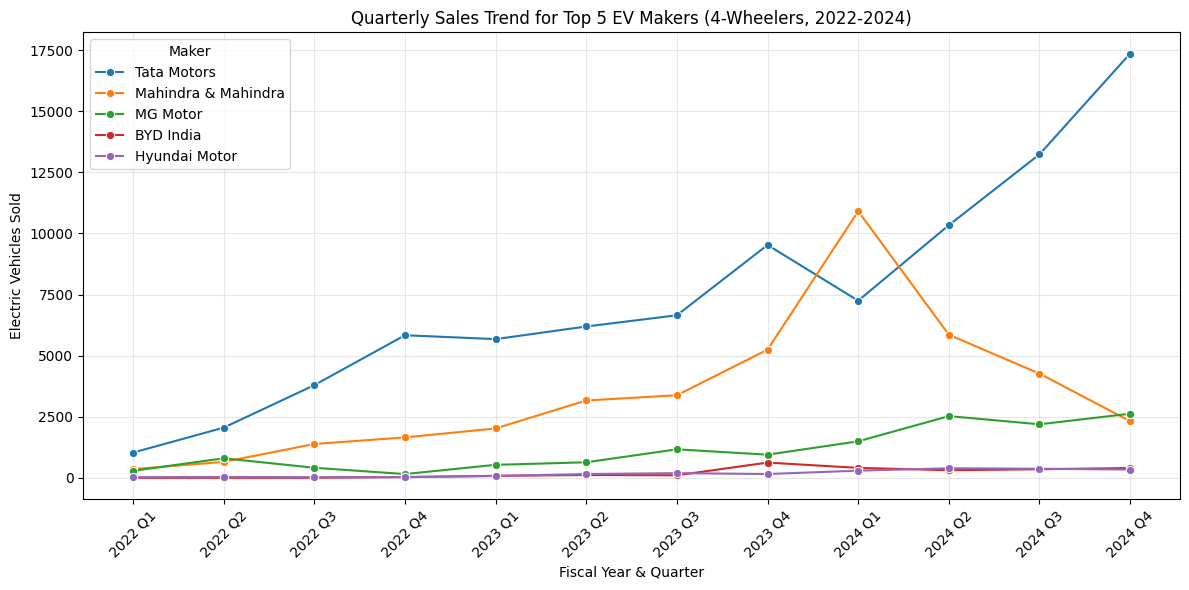

In [140]:
# Step 1: Filter for 4-wheelers and years 2022-2024
subset = merged_ev_makers[(merged_ev_makers['vehicle_category']=='4-Wheelers') & (merged_ev_makers['fiscal_year'].between(2022, 2024))]

# Step 2: Identify top 5 makers by total sales in this period
maker_sales = subset.groupby('maker')['electric_vehicles_sold'].sum().sort_values(ascending=False).head(5)
top5_makers = maker_sales.index.tolist()

# Step 3: Prepare pivot table by fiscal_year and quarter for these makers
plot_df = subset[subset['maker'].isin(top5_makers)].groupby(['maker', 'fiscal_year', 'quarter'])['electric_vehicles_sold'].sum().reset_index()

# Prepare a column to combine year and quarter for simple x-axis labels
plot_df['year_quarter'] = plot_df['fiscal_year'].astype(str) + ' ' + plot_df['quarter']
plt.figure(figsize=(12,6))
sns.lineplot(
    data=plot_df, x='year_quarter', y='electric_vehicles_sold', hue='maker',
    marker='o', palette='tab10', hue_order=top5_makers
)
plt.title('Quarterly Sales Trend for Top 5 EV Makers (4-Wheelers, 2022-2024)')
plt.xlabel('Fiscal Year & Quarter')
plt.ylabel('Electric Vehicles Sold')
plt.grid(True,alpha=0.3)
plt.xticks(rotation=45)
plt.legend(title='Maker')
plt.tight_layout()
plt.show()

### 5. **How do the EV sales and penetration rates in Delhi compare to Karnataka for 2024?**

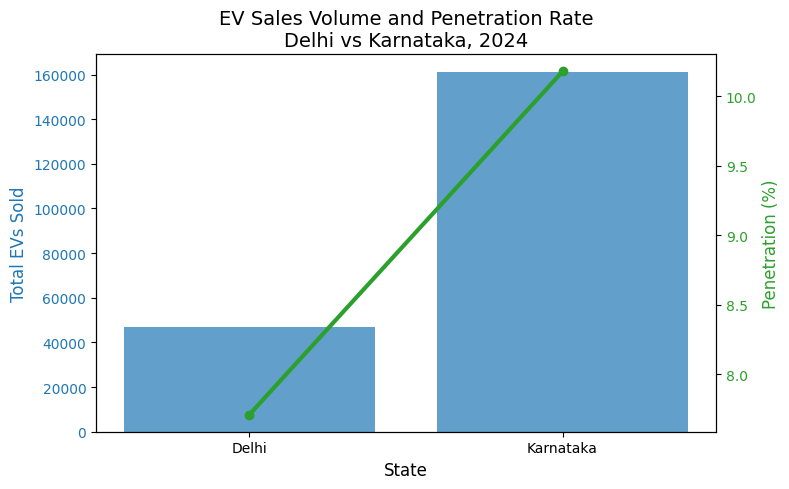

In [ ]:
# Plot to compare EV sales and penetration rates in Delhi vs Karnataka (2024)
import matplotlib.pyplot as plt
import seaborn as sns

# Data for plotting
states = state_summary['state']
ev_sold = state_summary['ev_sold']
penetration_pct = state_summary['penetration_pct']

fig, ax1 = plt.subplots(figsize=(8,5))

# Bar plot for EV Sold
color1 = 'tab:blue'
ax1.bar(states, ev_sold, color=color1, alpha=0.7)
ax1.set_ylabel('Total EVs Sold', color=color1, fontsize=12)
ax1.set_xlabel('State', fontsize=12)
ax1.tick_params(axis='y', labelcolor=color1)

# Secondary axis for penetration rate
ax2 = ax1.twinx()
color2 = 'tab:green'
ax2.plot(states, penetration_pct, color=color2, marker='o', linewidth=3, label='Penetration (%)')
ax2.set_ylabel('Penetration (%)', color=color2, fontsize=12)
ax2.tick_params(axis='y', labelcolor=color2)

plt.title('EV Sales Volume and Penetration Rate\nDelhi vs Karnataka, 2024', fontsize=14)
fig.tight_layout()
plt.show()


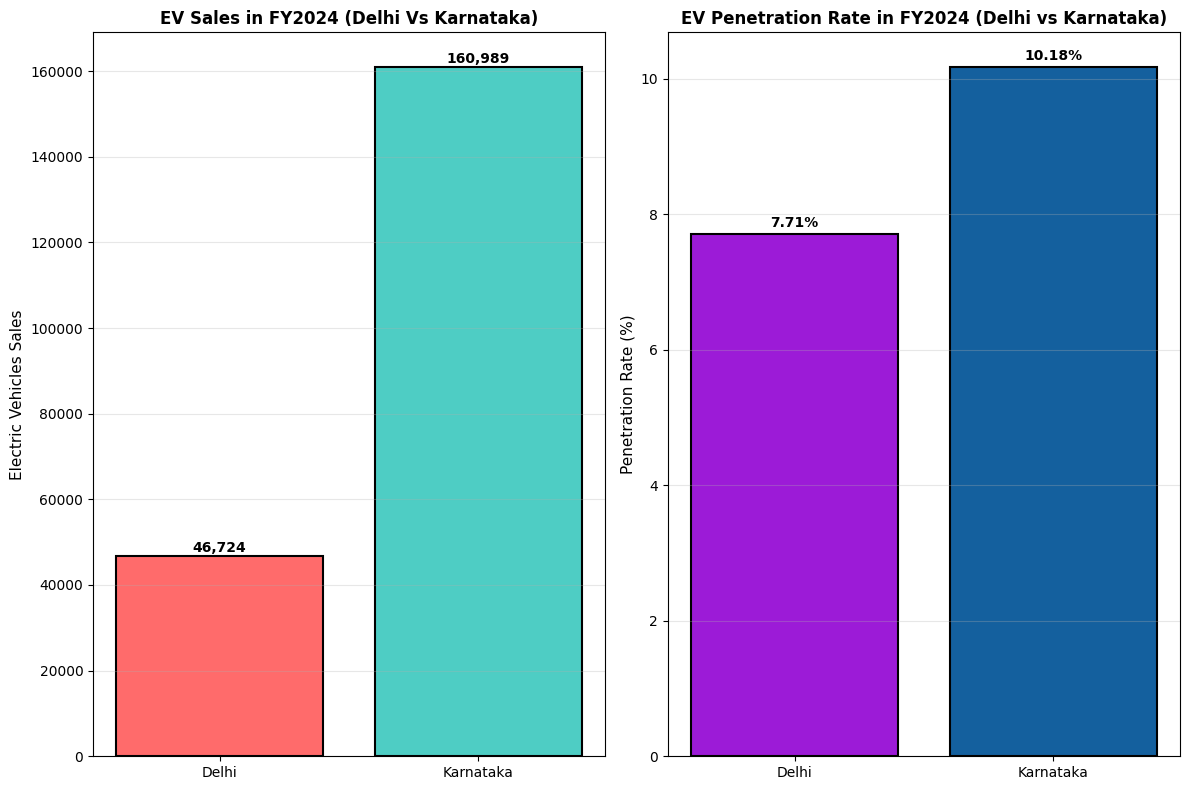

In [ ]:
# filter data  with state conatin 'Delhi' and 'Karnataka'  and fiscal_year is 2024
state_data=enriched_ev_state[(enriched_ev_state['fiscal_year']==2024) & (enriched_ev_state['state'].isin(['Delhi','Karnataka']))]

# calculate the penetration_pct for Delhi and Karnataka
state_summary=state_data.groupby('state').agg(
    ev_sold=('electric_vehicles_sold','sum'),
    total_vehicle_sold=('total_vehicles_sold','sum')
).reset_index()

state_summary['penetration_pct']= (state_summary['ev_sold'] * 100/state_summary['total_vehicle_sold']).round(2)

# Plot to compare EV sales and penetration rates in Delhi vs Karnataka (2024)
fig, axes = plt.subplots(1, 2, figsize=(12, 8))

# Plot 1: EV Sales
axes[0].bar(state_summary['state'], state_summary['ev_sold'], color=['#FF6B6B', '#4ECDC4'], edgecolor='black', linewidth=1.5)
axes[0].set_title('EV Sales in FY2024 (Delhi Vs Karnataka)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Electric Vehicles Sales', fontsize=11)
for i, v in enumerate(state_summary['ev_sold']):
    axes[0].text(i, v + 1000, f'{v:,}', ha='center', fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Plot 2: Penetration Rate
axes[1].bar(state_summary['state'], state_summary['penetration_pct'], color=["#9914D6F8", "#14609E"], edgecolor='black', linewidth=1.5)
axes[1].set_title('EV Penetration Rate in FY2024 (Delhi vs Karnataka)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Penetration Rate (%)', fontsize=11)
for i, v in enumerate(state_summary['penetration_pct']):
    axes[1].text(i, v + 0.1, f'{v}%', ha='center', fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### 6. **List down the compounded annual growth rate (CAGR) in 4-wheeler units for the top 5 makers from 2022 to 2024.**

In [ ]:
# Filter all makers from 2022 to 2024 who are selling the 4 wheelers EV Vehicles
subset= enriched_ev_state[(enriched_ev_state['fiscal_year'].between(2022,2024)) & (enriched_ev_state['vehicle_category']=='4-Wheelers')]

# calculating the CAGR for each makers in 2024
cagr_category=subset.groupby('maker').agg(
    
)

In [189]:
# Calculate CAGR for 4-wheeler units for top 5 makers (2022 to 2024)
# Step 1: Filter and aggregate 4-wheeler sales by maker for 2022 and 2024
agg_22 = subset[subset['fiscal_year'] == 2022].groupby('maker')['electric_vehicles_sold'].sum()
agg_24 = subset[subset['fiscal_year'] == 2024].groupby('maker')['electric_vehicles_sold'].sum()

# Step 2: Only keep makers present in both years to avoid spurious zero division
common_makers = agg_22.index.intersection(agg_24.index)
agg_22 = agg_22.loc[common_makers]
agg_24 = agg_24.loc[common_makers]

# Step 3: Calculate total 2022+2024 sales and select top 5 makers overall (to avoid missing out a leading brand due to zero-sales in one year)
top5 = (agg_22 + agg_24).sort_values(ascending=False).head(5).index

# Step 4: Calculate CAGR for these top 5 makers
results = []
for maker in top5:
    start = agg_22[maker]
    end = agg_24[maker]
    if start > 0 and end > 0:
        cagr = (end / start) ** (1/2) - 1  # 2 years difference
    else:
        cagr = None  # Not defined if no sales either year
    results.append({'maker': maker, '2022_sales': start, '2024_sales': end, 'CAGR': cagr})

cagr_df = pd.DataFrame(results)
# Display CAGR as percentage for clarity
cagr_df['CAGR_pct'] = (cagr_df['CAGR']*100).round(2)
display(cagr_df[['maker', '2022_sales', '2024_sales', 'CAGR_pct']])

,maker,2022_sales,2024_sales,CAGR_pct
0,Tata Motors,12708,48181,94.71
1,Mahindra & Mahindra,4042,23346,140.33
2,MG Motor,1647,8829,131.53
3,PCA Automobiles,0,1533,NaN
4,Hyundai Motor,110,1390,255.48
